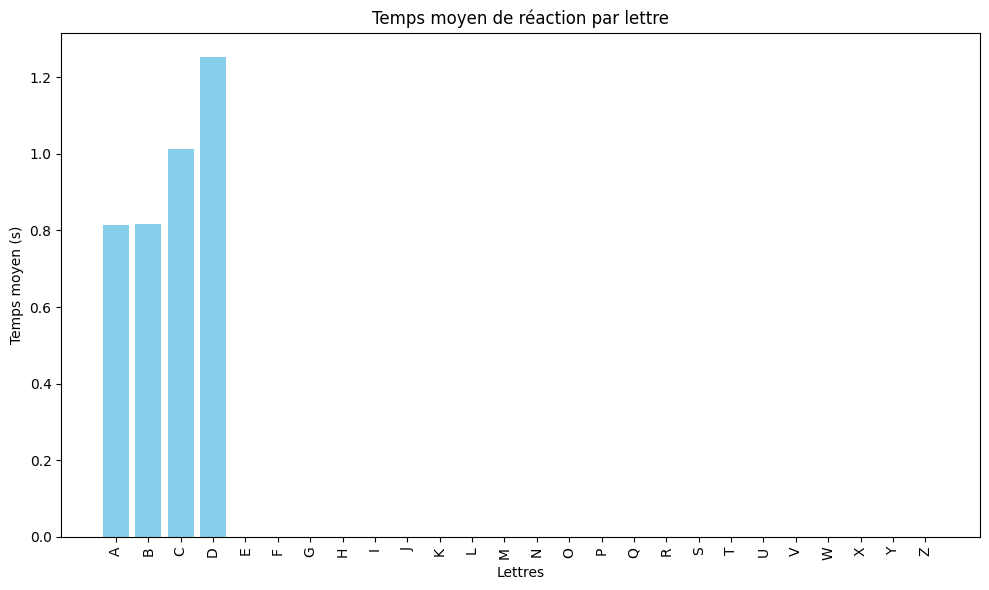

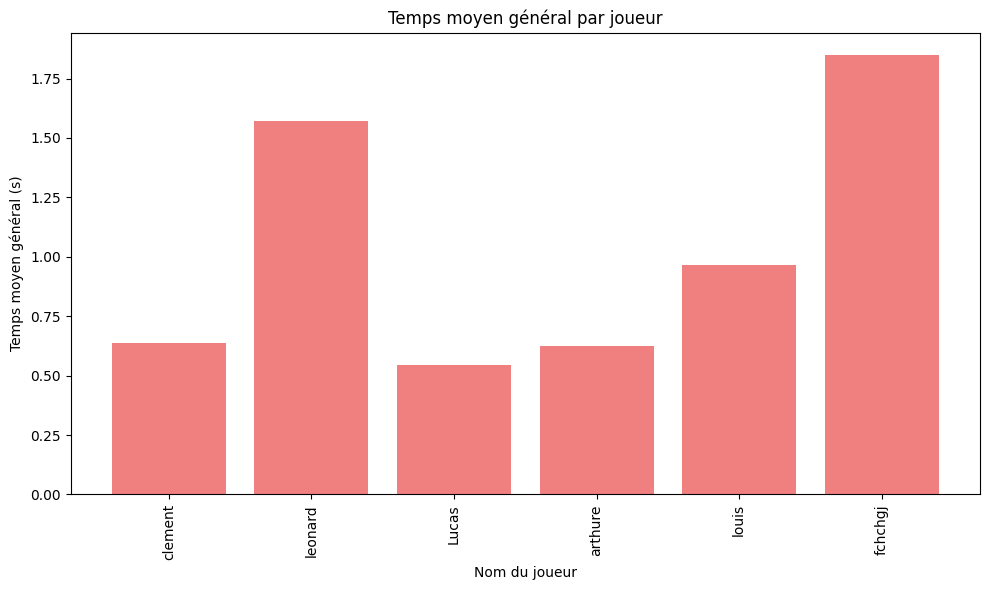

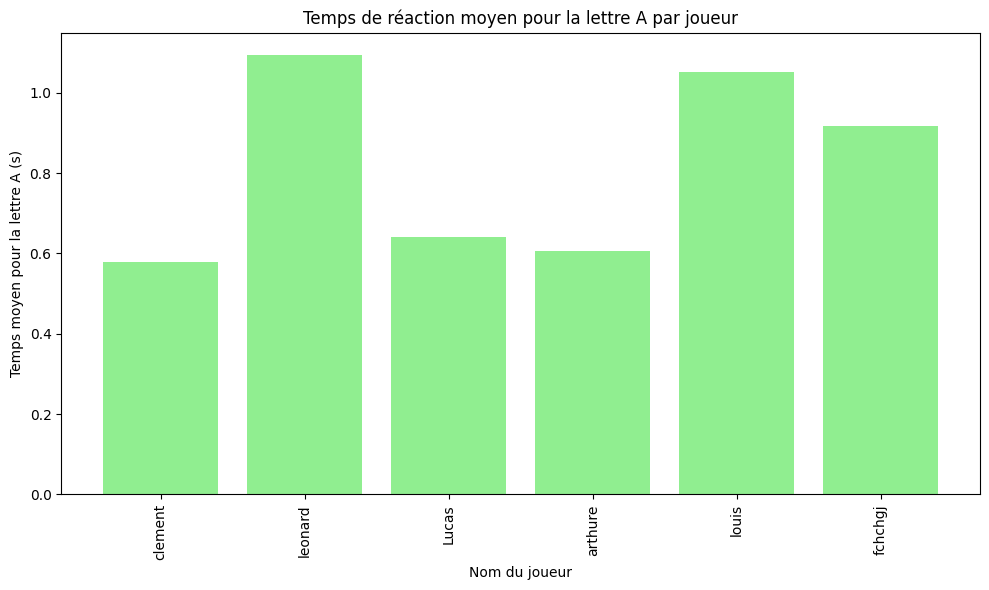

In [2]:
import matplotlib.pyplot as plt
import csv

# Chemin vers le fichier CSV
CSV_FILE = '/Users/clementgardair/Documents/GitHub/Python/Base.csv'

# Récupérer les données du fichier CSV
players = []
average_times = []
letter_avg_times = {chr(i): [] for i in range(65, 91)}  # A à Z

# Charger les données du fichier CSV
with open(CSV_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        player_name = row['player_name']
        avg_time = float(row['avg_time']) if row['avg_time'] else 0
        players.append(player_name)
        average_times.append(avg_time)
        
        for letter in range(65, 91):  # De A à Z
            letter_char = chr(letter)
            letter_time = float(row.get(letter_char, 0)) if row.get(letter_char) else 0
            letter_avg_times[letter_char].append(letter_time)

# 1. Graphique des temps moyens par lettre
avg_times_by_letter = {letter: sum(times) / len(times) if times else 0 for letter, times in letter_avg_times.items()}

plt.figure(figsize=(10, 6))
plt.bar(avg_times_by_letter.keys(), avg_times_by_letter.values(), color='skyblue')
plt.xlabel('Lettres')
plt.ylabel('Temps moyen (s)')
plt.title('Temps moyen de réaction par lettre')
plt.xticks(rotation=90)
plt.tight_layout()

# 2. Graphique du temps moyen général par joueur
plt.figure(figsize=(10, 6))
plt.bar(players, average_times, color='lightcoral')
plt.xlabel('Nom du joueur')
plt.ylabel('Temps moyen général (s)')
plt.title('Temps moyen général par joueur')
plt.xticks(rotation=90)
plt.tight_layout()

# 3. Graphique comparatif des temps de réaction moyens pour une lettre donnée (exemple pour la lettre "A")
letter_to_analyze = "A"
reaction_times_for_letter = letter_avg_times[letter_to_analyze]  # Liste des temps pour la lettre "A"

plt.figure(figsize=(10, 6))
plt.bar(players, reaction_times_for_letter, color='lightgreen')
plt.xlabel('Nom du joueur')
plt.ylabel(f'Temps moyen pour la lettre {letter_to_analyze} (s)')
plt.title(f'Temps de réaction moyen pour la lettre {letter_to_analyze} par joueur')
plt.xticks(rotation=90)
plt.tight_layout()

# Afficher les graphiques
plt.show()
